In [3]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Step 2: Show basic info about the dataset
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


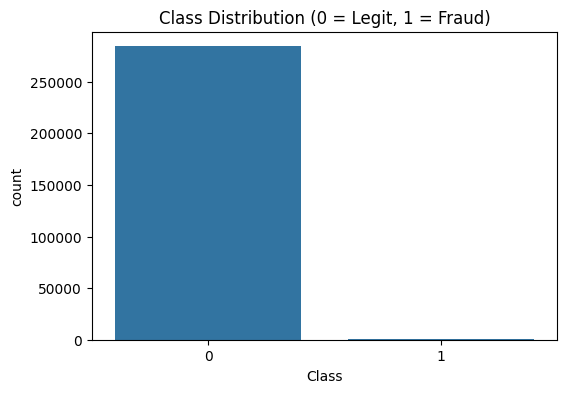

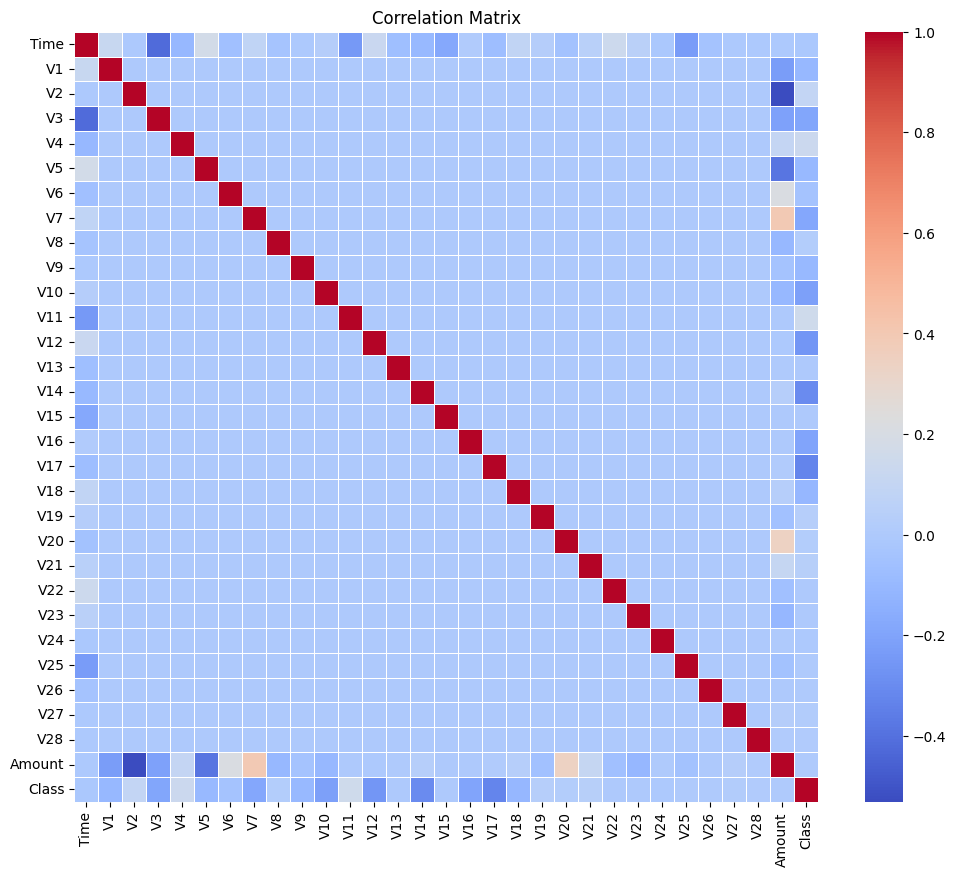

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check class distribution
print("Class distribution:\n", df['Class'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

# Plot correlations (optional heavy computation)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Drop any rows with NaN values (just in case)
df_cleaned = df.dropna()

# Step 2: Separate features and target
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Confirm new balance
print("After SMOTE, class distribution:\n", pd.Series(y_train_resampled).value_counts())


After SMOTE, class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("📌 Logistic Regression Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


📌 Logistic Regression Evaluation:
Confusion Matrix:
 [[21956   190]
 [    9    46]]
Classification Report:
               precision    recall  f1-score   support

         0.0     0.9996    0.9914    0.9955     22146
         1.0     0.1949    0.8364    0.3162        55

    accuracy                         0.9910     22201
   macro avg     0.5973    0.9139    0.6558     22201
weighted avg     0.9976    0.9910    0.9938     22201

ROC AUC Score: 0.938302422764628


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.linear_model import RidgeClassifier

model2 = RidgeClassifier()
model2.fit(X_train_resampled, y_train_resampled)
y_pred2 = model2.predict(X_test)

print("📌 Ridge Classifier")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2, digits=4))


📌 Ridge Classifier
[[21860   286]
 [   12    43]]
              precision    recall  f1-score   support

         0.0     0.9995    0.9871    0.9932     22146
         1.0     0.1307    0.7818    0.2240        55

    accuracy                         0.9866     22201
   macro avg     0.5651    0.8845    0.6086     22201
weighted avg     0.9973    0.9866    0.9913     22201



In [9]:
from sklearn.linear_model import PassiveAggressiveClassifier

model3 = PassiveAggressiveClassifier(max_iter=1000)
model3.fit(X_train_resampled, y_train_resampled)
y_pred3 = model3.predict(X_test)

print("📌 Passive Aggressive")
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3, digits=4))


📌 Passive Aggressive
[[19068  3078]
 [    9    46]]
              precision    recall  f1-score   support

         0.0     0.9995    0.8610    0.9251     22146
         1.0     0.0147    0.8364    0.0289        55

    accuracy                         0.8610     22201
   macro avg     0.5071    0.8487    0.4770     22201
weighted avg     0.9971    0.8610    0.9229     22201



In [10]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=100)
model4.fit(X_train_resampled, y_train_resampled)
y_pred4 = model4.predict(X_test)
y_proba4 = model4.predict_proba(X_test)[:, 1]

print("📌 Random Forest")
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba4))


📌 Random Forest
[[22146     0]
 [   12    43]]
              precision    recall  f1-score   support

         0.0     0.9995    1.0000    0.9997     22146
         1.0     1.0000    0.7818    0.8776        55

    accuracy                         0.9995     22201
   macro avg     0.9997    0.8909    0.9386     22201
weighted avg     0.9995    0.9995    0.9994     22201

ROC AUC: 0.9573159117591521


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

model5 = GradientBoostingClassifier()
model5.fit(X_train_resampled, y_train_resampled)
y_pred5 = model5.predict(X_test)
y_proba5 = model5.predict_proba(X_test)[:, 1]

print("📌 Gradient Boosting")
print(confusion_matrix(y_test, y_pred5))
print(classification_report(y_test, y_pred5, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba5))


📌 Gradient Boosting
[[22112    34]
 [   10    45]]
              precision    recall  f1-score   support

         0.0     0.9995    0.9985    0.9990     22146
         1.0     0.5696    0.8182    0.6716        55

    accuracy                         0.9980     22201
   macro avg     0.7846    0.9083    0.8353     22201
weighted avg     0.9985    0.9980    0.9982     22201

ROC AUC: 0.9644130275937374


In [12]:
from sklearn.ensemble import AdaBoostClassifier

model6 = AdaBoostClassifier()
model6.fit(X_train_resampled, y_train_resampled)
y_pred6 = model6.predict(X_test)
y_proba6 = model6.predict_proba(X_test)[:, 1]

print("📌 AdaBoost")
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba6))


📌 AdaBoost
[[21920   226]
 [    8    47]]
              precision    recall  f1-score   support

         0.0     0.9996    0.9898    0.9947     22146
         1.0     0.1722    0.8545    0.2866        55

    accuracy                         0.9895     22201
   macro avg     0.5859    0.9222    0.6406     22201
weighted avg     0.9976    0.9895    0.9929     22201

ROC AUC: 0.9447694227564182


In [13]:
from sklearn.ensemble import BaggingClassifier

model7 = BaggingClassifier()
model7.fit(X_train_resampled, y_train_resampled)
y_pred7 = model7.predict(X_test)
y_proba7 = model7.predict_proba(X_test)[:, 1]

print("📌 Bagging Classifier")
print(confusion_matrix(y_test, y_pred7))
print(classification_report(y_test, y_pred7, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba7))


📌 Bagging Classifier
[[22139     7]
 [   14    41]]
              precision    recall  f1-score   support

         0.0     0.9994    0.9997    0.9995     22146
         1.0     0.8542    0.7455    0.7961        55

    accuracy                         0.9991     22201
   macro avg     0.9268    0.8726    0.8978     22201
weighted avg     0.9990    0.9991    0.9990     22201

ROC AUC: 0.898816531612522


In [14]:
from sklearn.ensemble import ExtraTreesClassifier

model8 = ExtraTreesClassifier()
model8.fit(X_train_resampled, y_train_resampled)
y_pred8 = model8.predict(X_test)
y_proba8 = model8.predict_proba(X_test)[:, 1]

print("📌 Extra Trees")
print(confusion_matrix(y_test, y_pred8))
print(classification_report(y_test, y_pred8, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba8))


📌 Extra Trees
[[22145     1]
 [   13    42]]
              precision    recall  f1-score   support

         0.0     0.9994    1.0000    0.9997     22146
         1.0     0.9767    0.7636    0.8571        55

    accuracy                         0.9994     22201
   macro avg     0.9881    0.8818    0.9284     22201
weighted avg     0.9994    0.9994    0.9993     22201

ROC AUC: 0.9649700746287035


In [15]:
from sklearn.naive_bayes import GaussianNB

model9 = GaussianNB()
model9.fit(X_train_resampled, y_train_resampled)
y_pred9 = model9.predict(X_test)
y_proba9 = model9.predict_proba(X_test)[:, 1]

print("📌 Gaussian Naive Bayes")
print(confusion_matrix(y_test, y_pred9))
print(classification_report(y_test, y_pred9, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba9))


📌 Gaussian Naive Bayes
[[21835   311]
 [   11    44]]
              precision    recall  f1-score   support

         0.0     0.9995    0.9860    0.9927     22146
         1.0     0.1239    0.8000    0.2146        55

    accuracy                         0.9855     22201
   macro avg     0.5617    0.8930    0.6037     22201
weighted avg     0.9973    0.9855    0.9908     22201

ROC AUC: 0.9527175028529674


In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report # Import necessary modules

model11 = LinearSVC(max_iter=1000)
model11.fit(X_train_resampled, y_train_resampled)
y_pred11 = model11.predict(X_test)

print("📌 Linear SVC")
print(confusion_matrix(y_test, y_pred11))
print(classification_report(y_test, y_pred11, digits=4))

📌 Linear SVC
[[55917   947]
 [   11    87]]
              precision    recall  f1-score   support

           0     0.9998    0.9833    0.9915     56864
           1     0.0841    0.8878    0.1537        98

    accuracy                         0.9832     56962
   macro avg     0.5420    0.9356    0.5726     56962
weighted avg     0.9982    0.9832    0.9901     56962



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score # Import roc_auc_score

model12 = KNeighborsClassifier()
model12.fit(X_train_resampled, y_train_resampled)
y_pred12 = model12.predict(X_test)
y_proba12 = model12.predict_proba(X_test)[:, 1]

print("📌 K-Nearest Neighbors")
print(confusion_matrix(y_test, y_pred12))
print(classification_report(y_test, y_pred12, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba12))

📌 K-Nearest Neighbors
[[54030  2834]
 [   43    55]]
              precision    recall  f1-score   support

           0     0.9992    0.9502    0.9741     56864
           1     0.0190    0.5612    0.0368        98

    accuracy                         0.9495     56962
   macro avg     0.5091    0.7557    0.5054     56962
weighted avg     0.9975    0.9495    0.9725     56962

ROC AUC: 0.7680932952809711


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score # Import roc_auc_score

model13 = DecisionTreeClassifier()
model13.fit(X_train_resampled, y_train_resampled)
y_pred13 = model13.predict(X_test)
y_proba13 = model13.predict_proba(X_test)[:, 1]

print("📌 Decision Tree")
print(confusion_matrix(y_test, y_pred13))
print(classification_report(y_test, y_pred13, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba13))

📌 Decision Tree
[[56765    99]
 [   23    75]]
              precision    recall  f1-score   support

           0     0.9996    0.9983    0.9989     56864
           1     0.4310    0.7653    0.5515        98

    accuracy                         0.9979     56962
   macro avg     0.7153    0.8818    0.7752     56962
weighted avg     0.9986    0.9979    0.9982     56962

ROC AUC: 0.8817825631941015
